<a href="https://colab.research.google.com/github/jvbsz/1TSCG-EXEMPLOgit-2024/blob/main/K_Fold_Exemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset
import numpy as np
import pandas as pd


df_linear.to_csv('/content/insurance.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t

# 1. Carrega o dataset
df = pd.read_csv('estoque_linear.csv')

# 2. Define X e y
X = df.drop(columns=["preco"])
y = df["preco"]

# 3. Transforma variáveis categóricas em dummies
X_encoded = pd.get_dummies(X, drop_first=True)

# 4. Separa treino e teste (holdout)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# 5. Configura o K-Fold (só no treino!)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = LinearRegression()
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)

# 6. Calcula média e IC (t-student) do CV
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores, ddof=1)
n = len(r2_scores)
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=n-1)
stderr = std_r2 / np.sqrt(n)
ci_lower = mean_r2 - t_crit * stderr
ci_upper = mean_r2 + t_crit * stderr

# 7. Treina no treino completo e avalia no teste (holdout)
model_final = LinearRegression()
model_final.fit(X_train, y_train)
y_pred_test = model_final.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

# 8. Mostra os resultados
print(f"R² em cada fold (CV): {np.round(r2_scores, 3)}")
print(f"Média do R² (CV): {mean_r2:.3f}")
print(f"IC 95% (CV): [{ci_lower:.3f}, {ci_upper:.3f}]")
print(f"R² no teste (holdout): {r2_test:.3f}")

R² em cada fold (CV): [0.627 0.733 0.63  0.696 0.763]
Média do R² (CV): 0.690
IC 95% (CV): [0.614, 0.765]
R² no teste (holdout): 0.609


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import t

# 1. Carrega o dataset
df = pd.read_csv('estoque_linear.csv')

# 2. Define X e y (classificação: fornecedor)
X = df.drop(columns=["fornecedor"])
y = df["fornecedor"]

# 3. Codifica as variáveis categóricas em dummies
X_encoded = pd.get_dummies(X, drop_first=True)

# 4. Separa treino e teste (stratificado pelo fornecedor)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# 5. StratifiedKFold só no treino!
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores = []

for train_idx, val_idx in skf.split(X_train, y_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = LogisticRegression(max_iter=5000)
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    acc_scores.append(acc)

# 6. Calcula média e IC (t-student) do CV
mean_acc = np.mean(acc_scores)
std_acc = np.std(acc_scores, ddof=1)
n = len(acc_scores)
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=n-1)
stderr = std_acc / np.sqrt(n)
ci_lower = mean_acc - t_crit * stderr
ci_upper = mean_acc + t_crit * stderr

# 7. Treina no treino completo e avalia no teste (holdout)
model_final = LogisticRegression(max_iter=5000)
model_final.fit(X_train, y_train)
y_pred_test = model_final.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)

# 8. Mostra os resultados
print(f"Acurácia em cada fold (treino, CV): {np.round(acc_scores, 3)}")
print(f"Média da acurácia (CV): {mean_acc:.3f}")
print(f"IC 95% (CV): [{ci_lower:.3f}, {ci_upper:.3f}]")
print(f"Acurácia no teste (holdout): {acc_test:.3f}")


Acurácia em cada fold (treino, CV): [0.344 0.281 0.312 0.344 0.375]
Média da acurácia (CV): 0.331
IC 95% (CV): [0.287, 0.375]
Acurácia no teste (holdout): 0.400


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t

# 1. Carrega o dataset
df = pd.read_csv('estoque_linear.csv')

# 2. Define X, y e grupos
X = df.drop(columns=["preco"])
y = df["preco"]
groups = df["fornecedor"]

# 3. Transforma variáveis categóricas em dummies (menos o grupo!)
X_encoded = pd.get_dummies(X.drop(columns=["fornecedor"]), drop_first=True)

# 4. Separa treino e teste por grupo (fornecedor)
# Garante que pelo menos um fornecedor fique para teste (exemplo: test_size=1 grupo)
fornecedores = df['fornecedor'].unique()

# Vamos pegar um fornecedor para o holdout (teste)
np.random.seed(42)
fornecedor_teste = np.random.choice(fornecedores, size=1, replace=False)
test_mask = df['fornecedor'].isin(fornecedor_teste)

X_train, X_test = X_encoded[~test_mask], X_encoded[test_mask]
y_train, y_test = y[~test_mask], y[test_mask]
groups_train = groups[~test_mask]

# 5. Configura o GroupKFold no treino
gkf = GroupKFold(n_splits=2)  # Dois fornecedores no treino, então 2 folds

r2_scores = []
for train_idx, val_idx in gkf.split(X_train, y_train, groups=groups_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = LinearRegression()
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)

# 6. Calcula média e IC do GroupKFold (validação)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores, ddof=1)
n = len(r2_scores)
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=n-1)
stderr = std_r2 / np.sqrt(n)
ci_lower = mean_r2 - t_crit * stderr
ci_upper = mean_r2 + t_crit * stderr

# 7. Treina no treino completo e avalia no holdout (teste)
model_final = LinearRegression()
model_final.fit(X_train, y_train)
y_pred_test = model_final.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

# 8. Mostra os resultados
print(f"R² em cada fold (GroupKFold, treino): {np.round(r2_scores, 3)}")
print(f"Média do R² (validação): {mean_r2:.3f}")
print(f"IC 95%: [{ci_lower:.3f}, {ci_upper:.3f}]")
print(f"R² no teste (holdout fornecedor={fornecedor_teste[0]}): {r2_test:.3f}")


R² em cada fold (GroupKFold, treino): [0.704 0.571]
Média do R² (validação): 0.637
IC 95%: [-0.209, 1.484]
R² no teste (holdout fornecedor=TechPlus): 0.719


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t

# 1. Carrega o dataset
df = pd.read_csv('estoque_linear.csv')

# 2. Define X e y
X = df.drop(columns=["preco"])
y = df["preco"]
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. Separa treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# 4. RepeatedKFold só no treino!
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
r2_scores = []

for train_idx, val_idx in rkf.split(X_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = LinearRegression()
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)

mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores, ddof=1)
n_cv = len(r2_scores)
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=n_cv-1)
stderr = std_r2 / np.sqrt(n_cv)
ci_lower = mean_r2 - t_crit * stderr
ci_upper = mean_r2 + t_crit * stderr

print(f"R² médio na validação cruzada: {mean_r2:.3f}")
print(f"IC 95% do R² (validação): [{ci_lower:.3f}, {ci_upper:.3f}]")

# 5. Treina no treino completo e testa no teste intocado
model_final = LinearRegression()
model_final.fit(X_train, y_train)
y_pred_test = model_final.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"R² no teste final (holdout): {r2_test:.3f}")


R² médio na validação cruzada: 0.689
IC 95% do R² (validação): [0.665, 0.712]
R² no teste final (holdout): 0.609


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from scipy.stats import t

# 1. Carrega o dataset
df = pd.read_csv('estoque_linear.csv')

# 2. Define X e y
X = df.drop(columns=["preco"])
y = df["preco"]

# 3. Transforma categóricas em dummies
X_encoded = pd.get_dummies(X, drop_first=True)

# 4. Separa treino e teste (holdout)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# 5. Configura o LeaveOneOut só no treino
loo = LeaveOneOut()
mae_scores = []

for train_idx, val_idx in loo.split(X_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model = LinearRegression()
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, y_pred)
    mae_scores.append(mae)

# 6. Calcula média e IC (t-student) do LOOCV
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores, ddof=1)
n = len(mae_scores)
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df=n-1)
stderr = std_mae / np.sqrt(n)
ci_lower = mean_mae - t_crit * stderr
ci_upper = mean_mae + t_crit * stderr

# 7. Treina no treino completo e avalia no teste (holdout)
model_final = LinearRegression()
model_final.fit(X_train, y_train)
y_pred_test = model_final.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# 8. Mostra os resultados
print(f"MAE médio (LOOCV): {mean_mae:.2f}")
print(f"IC 95% (LOOCV): [{ci_lower:.2f}, {ci_upper:.2f}]")
print(f"MAE no teste (holdout): {mae_test:.2f}")


MAE médio (LOOCV): 64.86
IC 95% (LOOCV): [56.85, 72.87]
MAE no teste (holdout): 72.59


 99%|===================| 20453/20640 [02:02<00:01]       /tmp/ipython-input-2775946874.py:17: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X, feature_names=data.feature_names)


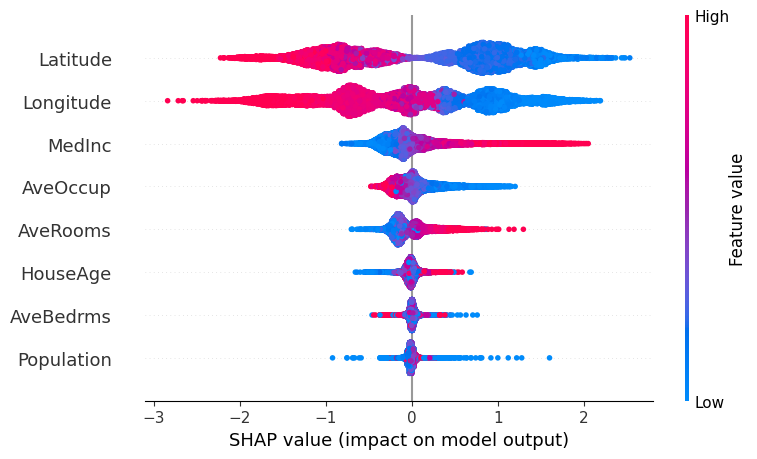

In [ ]:
import shap
import xgboost as xgb
from sklearn.datasets import fetch_california_housing

# Carrega o dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Treina um modelo
model = xgb.XGBRegressor().fit(X, y)

# Cria explainer SHAP
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Plota o summary plot
shap.summary_plot(shap_values, X, feature_names=data.feature_names)


100%|===================| 20543/20640 [02:06<00:00]       

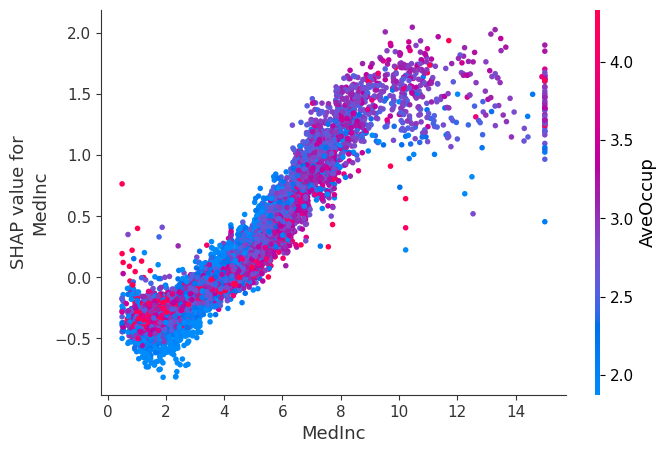

In [ ]:
import shap
import xgboost as xgb
from sklearn.datasets import fetch_california_housing

# 1. Carrega o dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# 2. Treina o modelo (pode ser outro, mas XGB é rápido)
model = xgb.XGBRegressor().fit(X, y)

# 3. Cria o explainer e calcula SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# 4. Faz o dependence plot: escolha uma feature principal e uma secundária (opcional)
# Exemplo: MedInc (Renda Mediana) vs. AveOccup (Ocupação Média)
shap.dependence_plot(
    "MedInc", shap_values.values, X, feature_names=feature_names, interaction_index="AveOccup"
)
